In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [207]:
folder = "C:\\Users\\henry\\"
train = "train.csv"
test = "test.csv"

In [208]:
train = pd.read_csv(os.path.join(folder, train))
test = pd.read_csv(os.path.join(folder, test))

In [209]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
nulls = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
nulls.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [210]:
survived = 'survived'
not_survived = 'not survived'
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

In [211]:
df = [train, test]
for data in df:
    data['relatives'] = data['SibSp'] + data['Parch']
    data.loc[data['relatives'] > 0, 'not_alone'] = 0
    data.loc[data['relatives'] == 0, 'not_alone'] = 1
    data['not_alone'] = data['not_alone'].astype(int)

In [212]:
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [213]:
train = train.drop(['PassengerId'], axis=1)

In [214]:
deck_dict = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
df = [train, test]

In [215]:
for data in df:
    data['Cabin'] = data['Cabin'].fillna("U0")
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z])").search(x).group())
    data['Deck'] = data['Deck'].map(deck_dict)
    data['Deck'] = data['Deck'].fillna(0)
    data['Deck'] = data['Deck'].astype(int)

In [216]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [217]:
df = [train, test]

In [218]:
for dataset in df:
    mean = train['Age'].mean()
    std = test['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train['Age'].astype(int)

In [219]:
common_value = "S"
df = [train, test]

In [220]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [221]:
df = [train, test]

In [222]:
for dataset in df:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [223]:
df = [train, test]
title_dict = {'Mr':1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

In [224]:
for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(title_dict)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [225]:
gender_dict = {"male":0, "female":1}
df = [train, test]

In [226]:
for dataset in df:
    dataset['Sex'] = dataset['Sex'].map(gender_dict)

In [227]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [228]:
port_dict = {"S":0, "C":1, "Q":2}
df = [train, test]

In [229]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map(port_dict)

In [230]:
df = [train, test]
for dataset in df:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [231]:
df = [train, test]
for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [232]:
##### New Features #####
df = [train, test]
for dataset in df:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']
for dataset in df:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [233]:
X_train = train.drop("Survived", axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

In [234]:
# Fitting classifiers

# SGD
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_predictions = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [235]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
acc_rf = round(rf.score(X_train, y_train) * 100, 2)

In [236]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_predictions = lr.predict(X_test)
acc_lr = round(lr.score(X_train, y_train) * 100, 2)

In [237]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predictions = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [238]:
# Perceptron
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)
y_predictions = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [239]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predictions = nb.predict(X_test)
acc_nb = round(nb.score(X_train, y_train) * 100, 2)

In [240]:
# Linear SVC
linear_SVC = LinearSVC()
linear_SVC.fit(X_train, y_train)
y_predictions = linear_SVC.predict(X_test)
acc_linear_SVC = round(linear_SVC.score(X_train, y_train) * 100, 2)

In [241]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predictions = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train) * 100, 2)

In [242]:
models = pd.Series(['Random Forest Classifier','Decision Tree Classifier','KNeighbors Classifier', 'Logistic Regression', 'Support Vector Machines', 'Perceptron', 'Naive Bayes', 'Stochastic Gradient Descent']).to_frame()
nums = pd.Series([acc_rf, acc_dt, acc_knn, acc_lr, acc_linear_SVC, acc_perceptron, acc_nb, acc_sgd]).to_frame()
acc_df = pd.concat([models, nums], axis=1)
acc_df.columns = ['Model', 'Score']

In [243]:
cv_score = cross_val_score(rf, X_train, y_train, cv=10, scoring="accuracy")

In [244]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

                 importance
feature                    
Title                 0.198
Sex                   0.180
Age_Class             0.093
Deck                  0.083
Age                   0.080
Pclass                0.078
relatives             0.062
Fare                  0.059
Embarked              0.050
Fare_Per_Person       0.044
SibSp                 0.040
Parch                 0.021
not_alone             0.011


In [245]:
train = train.drop(columns=['not_alone','Parch'])
test = test.drop(columns=['not_alone','Parch'])

In [41]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
acc_rf = rf.score(X_train, y_train).round(2) * 100
oob_rf = round(rf.oob_score_, 4) * 100

In [42]:
# CV
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [246]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [247]:
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=12, n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

In [248]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [249]:
y_predictions = rf.predict(X_test)

In [250]:
rf.score(X_train, y_train)

0.8888888888888888

In [251]:
rf.oob_score_

0.8294051627384961

In [252]:
predictions = cross_val_predict(rf, X_train, y_train, cv=3)

In [253]:
confusion_matrix(y_train, predictions)

array([[492,  57],
       [ 97, 245]], dtype=int64)

In [254]:
precision_score(y_train, predictions)

0.8112582781456954

In [255]:
recall_score(y_train, predictions)

0.716374269005848

In [256]:
f1_score(y_train, predictions)

0.7608695652173915

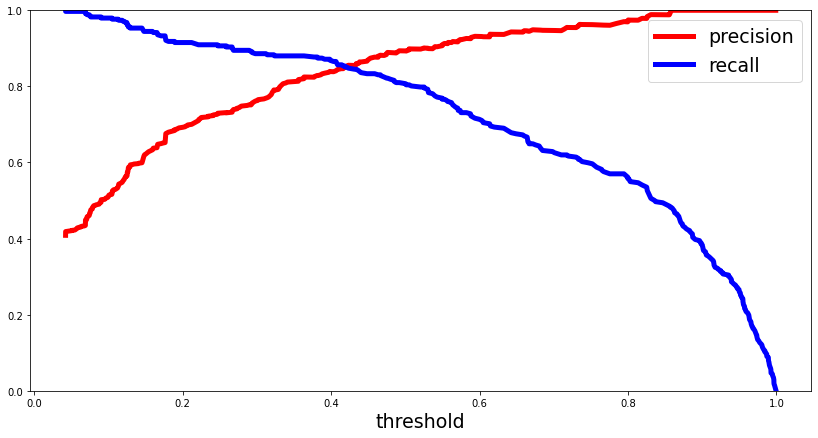

In [259]:
# getting the probabilities of our predictions
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

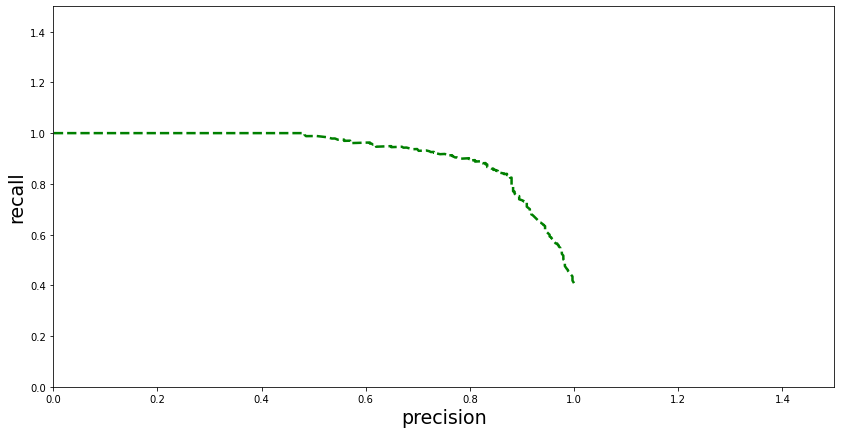

In [260]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

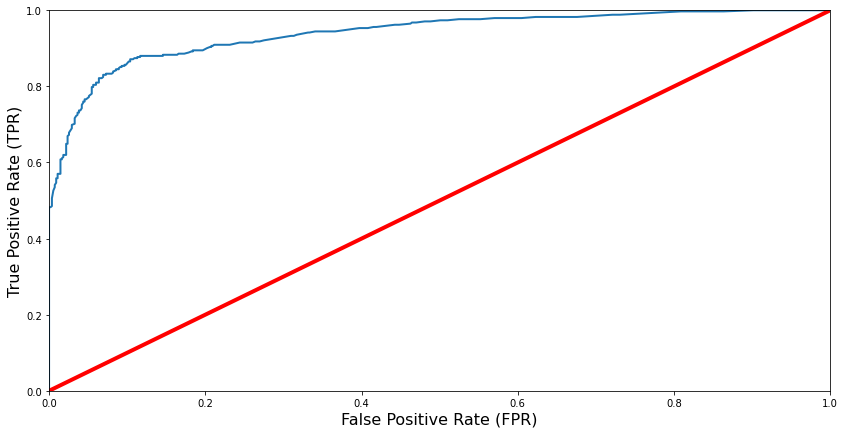

In [262]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [266]:
roc_auc = roc_auc_score(y_train, y_scores).round(3)

In [267]:
print("ROC-AUC Score: {}".format(roc_auc))

ROC-AUC Score: 0.939
